##Реализация Алгоритма k-means

In [3]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_blobs

n_samples = 3000
n_clusters = 10
X, y = make_blobs(n_samples = n_samples, n_features = 2, centers = n_clusters, random_state = 999)
X_start = np.copy(X)

##Ручная генерация точек

In [4]:
def random_points(n_samples, random_state=0):
    X = np.zeros(n_samples, dtype=float)
    states_amount = 6
    parts = n_clusters#np.random.randint(1, n_clusters, dtype=int)
    if (random_state % states_amount == 0):
        X[:, 0] = np.random.random_sample(n_samples[0])
        X[:, 1] = np.random.random_sample(n_samples[0])
    if (random_state % states_amount == 1):
        X[:, 0] = np.random.random_sample(n_samples[0])
        X[:, 1] = np.random.random_sample(n_samples[0]) ** np.random.random_sample(n_samples[0]) + np.sqrt( np.random.random_sample(n_samples[0]) )
    if (random_state % states_amount == 2):
        X[:, 0] = np.random.random_sample(n_samples[0]) + np.sqrt(np.random.random_sample(n_samples[0]))
        X[:, 1] = np.random.random_sample(n_samples[0]) ** (np.random.random_sample(n_samples[0]) * 20)
    if (random_state % states_amount == 3):
        X[:, 0] = np.random.random_sample(n_samples[0]) / (np.random.random_sample(n_samples[0]) * 10) 
        X[:, 1] = np.random.random_sample(n_samples[0]) * np.random.random_sample(n_samples[0]) * np.random.random_sample(n_samples[0]) * np.random.random_sample(n_samples[0])
    if (random_state % states_amount == 4):
        X[:, 0] = np.random.random_sample(n_samples[0]) * np.random.randint(-3*n_samples[0], 0, n_samples[0])
        X[:, 1] = np.random.random_sample(n_samples[0]) ** np.random.random_sample(n_samples[0]) + np.sqrt( np.random.random_sample(n_samples[0]) )
    if (random_state % states_amount == 5):
        for i in range(parts):
            slice1 = i * n_samples[0] // parts
            slice2 = (i + 1) * n_samples[0] // parts
            X[slice1:slice2, 0] = np.random.random_sample(slice2 - slice1) + np.sqrt(i * np.random.random_sample(slice2 - slice1))
            X[slice1:slice2, 1] = np.random.random_sample(slice2 - slice1) + i ** 2
    return X


X = random_points((n_samples, 2), random_state=5)
X_start = np.copy(X)

**Генерируем центры**

In [5]:
#creating centers
#np.random.seed(4)
centers = np.empty((0,2))
for i in range(n_clusters):
    rand_line = np.random.randint(0, n_samples)
    #print( rand_line )
    centers = np.append(centers, X[rand_line, :])

centers = np.reshape(centers, (n_clusters, 2))
centers_start = np.copy(centers)

In [6]:
#adding to X clusters column
clusters = np.random.randint(0, n_clusters, (n_samples, 1))
X_with_clusters = np.append(X, clusters, axis=1)
X_with_clusters_start = np.copy(X_with_clusters)

Начальное состояние:

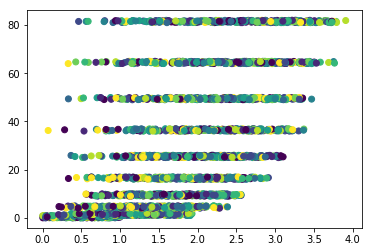

In [7]:
plt.scatter(X[:, 0], X[:, 1], c=X_with_clusters[:, 2])

In [8]:
#X_with_clusters[:, 2]

**Сам алгоритм:**

In [9]:
import time
#print( np.shape(cur_clusters) )
start_time = time.clock()
def k_means_algorithm(X, X_with_clusters, centers ):
    cur_clusters = np.zeros(n_samples, float)
    difference = 5
    while (np.max(difference) != 0):
        prev_centers = np.copy(centers)
        center_X_difference = X[:, None] - centers
        cur_clusters = np.argsort(np.linalg.norm(center_X_difference, axis = 2), axis = 1)[:, 0]
        X_with_clusters[:, 2] = cur_clusters    
        for k in range(n_clusters):
            power_of_cluster = np.alen(X[X_with_clusters[:,2] == k ])
            if power_of_cluster != 0:
                centers[k, :] = np.nansum(X[X_with_clusters[:, 2] == k], axis=0) / power_of_cluster
        difference = np.linalg.norm((centers - prev_centers), axis=1)
    return X, X_with_clusters

X, X_with_clusters = k_means_algorithm(X=X, X_with_clusters=X_with_clusters, centers=centers)
print(time.clock() - start_time)

0.033241000000000076


**После работы алгоритма:**

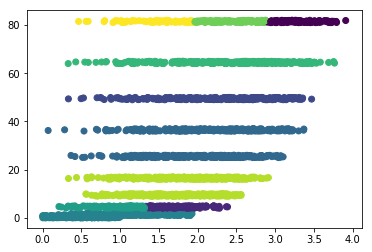

In [10]:
X_with_clusters.astype(int)
plt.scatter(X[:, 0], X[:, 1], c=X_with_clusters[:,2])

**Сравним с работой алгоритма KMeans( sklearn )**

0.03692300000000004


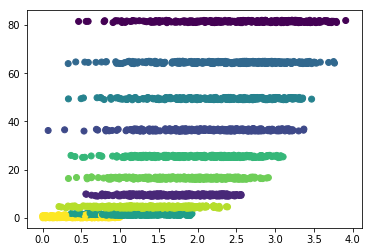

In [11]:
from sklearn.cluster import KMeans
X1 = np.copy(X_start)
time_start2 = time.clock()
a = KMeans(n_clusters=n_clusters, random_state=0).fit_predict(X1)
print( time.clock() - time_start2 )

plt.scatter(X1[:, 0], X1[:, 1], c=a)

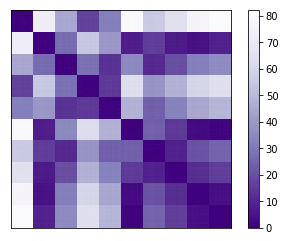

In [12]:
i  = np.argsort(a)
X2 = X1[i, :]

D = (X2[:,0][:, np.newaxis] - X2[:,0]) ** 2
D += (X2[:,1][:, np.newaxis] - X2[:,1]) ** 2
D = np.sqrt(D)

plt.figure(figsize=(5, 4))
plt.imshow(D, cmap='Purples_r', aspect='auto')
plt.xticks([])
plt.yticks([])
plt.colorbar(orientation='vertical', pad=0.06);

##Поиск моделей, на которых k-means( из sklearn ) работает не так, как мы ожидаем:

**1) Две окружности, одна из которых достаточно маленького радиуса, находящаяся внутри окр. бОльшего радиуса**

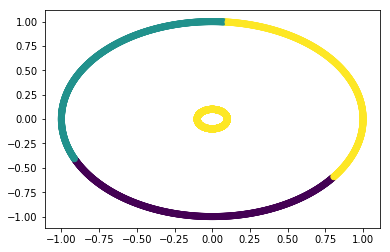

In [13]:
from sklearn.datasets import make_circles
X = make_circles(n_samples=n_samples, random_state=2, factor=.1)
X = np.array(X[0])
a = KMeans(n_clusters=3, random_state=0).fit_predict(X)
plt.scatter(X[:, 0], X[:, 1], c=a)



**2) Алгоритм плохо кластеризует окружности( этот пример чем-то похож на тот, который был на лекции )**

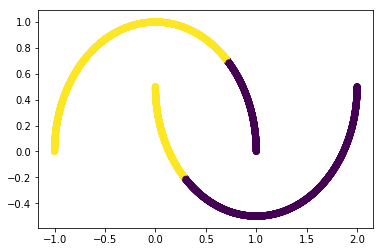

In [14]:
from sklearn.datasets import make_moons
X, y = make_moons(n_samples=n_samples, random_state=11)
X = np.append(X, make_moons(n_samples=n_samples, shuffle=True, random_state=10)[0], axis=0 )
a = KMeans(n_clusters=2, random_state=0).fit_predict(X)
plt.scatter(X[:,0], X[:, 1], c=a)


##Модели, на которых не работает алгоритм, реализованный мной:

####1)Достаточно много параллельных прямых с возрастающим расстоянием между ними 

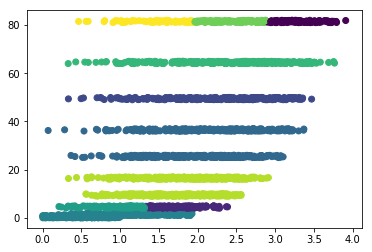

In [19]:
X, X_with_clusters = k_means_algorithm(X=X_start, X_with_clusters=X_with_clusters_start, centers=centers_start)
X_with_clusters.astype(int)
plt.scatter(X[:, 0], X[:, 1], c=X_with_clusters[:,2])
